In [2]:
!pip install apriori_python efficient-apriori fpgrowth_py pyarmviz numpy pandas matplotlib seaborn  scikit-learn matplotlib umap-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Лаба 2

In [3]:
# Манипулирование данными
import pandas as pd # для манипулирования данными
import numpy as np

# Визуализация
import plotly.express as px # для визуализации данных
import matplotlib.pyplot as plt # для отображения рукописных цифр

# Sklearn
from sklearn import *
from sklearn.datasets import * # для данных MNIST
from sklearn.manifold import TSNE # для снижения размерности с помощью t-SNE

from umap import *


def pltWithScaler(rawData, ScalerName, reducer):
    scaled_data = ScalerName().fit_transform(rawData)
    embedded = reducer.fit_transform(scaled_data)
    print(embedded.shape)
    plt.scatter(
        embedded[:, 0],
        embedded[:, 1]
        c=[sns.color_palette()[x] for x in tps.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{reducer.__class__.__name__} projection with {ScalerName.__name__} of the Ionsphere dataset', fontsize=24)
    plt.show()

#reducerUMAP = UMAP(n_jobs=-1)

# pltWithScaler(data, preprocessing.StandardScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.MinMaxScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.RobustScaler, reducerUMAP)

if __name__ == "__main__":
    data = []
    with open("/content/drive/MyDrive/Colab Notebooks/data/ionosphere.csv", "r") as file:
        file.readline()
        data = np.loadtxt(file, delimiter=",")

    print(data.shape)
    data = pd.DataFrame(data)
    data = data.drop([0])
    reducerTSNE = TSNE(n_jobs=-1,
                       # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
                       )
    reducerUMAP = UMAP(n_jobs=-1)
    pltWithScaler(data, preprocessing.StandardScaler, reducerTSNE)
    pltWithScaler(data, preprocessing.MinMaxScaler, reducerTSNE)
    pltWithScaler(data, preprocessing.RobustScaler, reducerTSNE)

    pltWithScaler(data, preprocessing.StandardScaler, reducerUMAP)
    pltWithScaler(data, preprocessing.MinMaxScaler, reducerUMAP)
    pltWithScaler(data, preprocessing.RobustScaler, reducerUMAP)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1534956520.py, line 23)

# Лаба 2. Сравнение

***** scaler name: standard scaling with index 11 *****


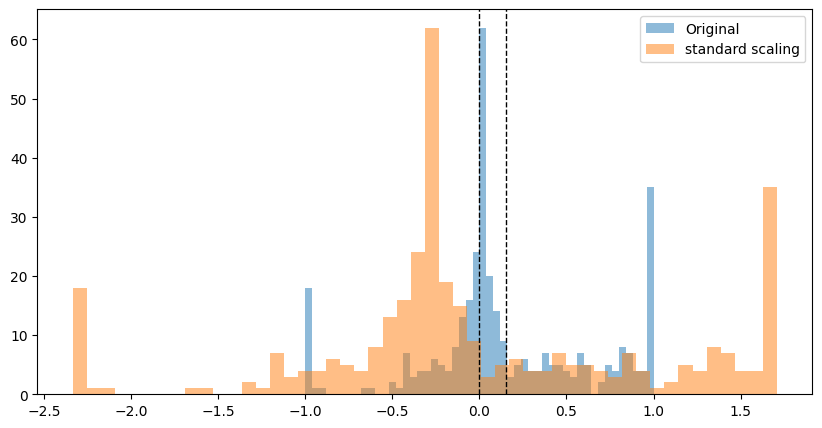

<Figure size 500x500 with 0 Axes>

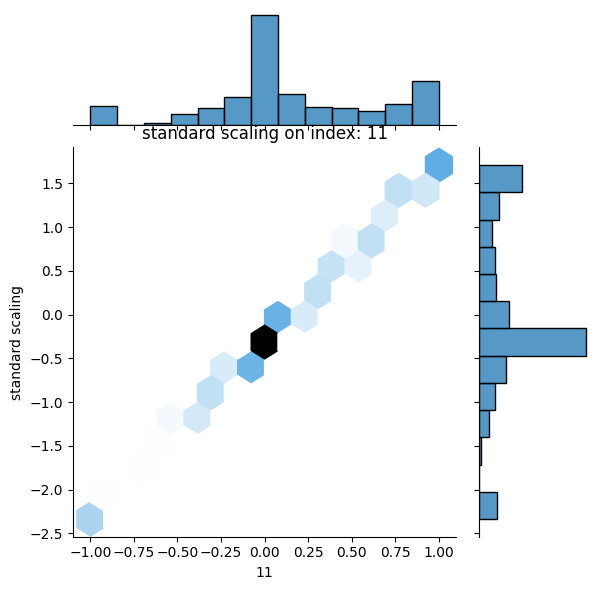

***** scaler name: min-max scaling with index 11 *****


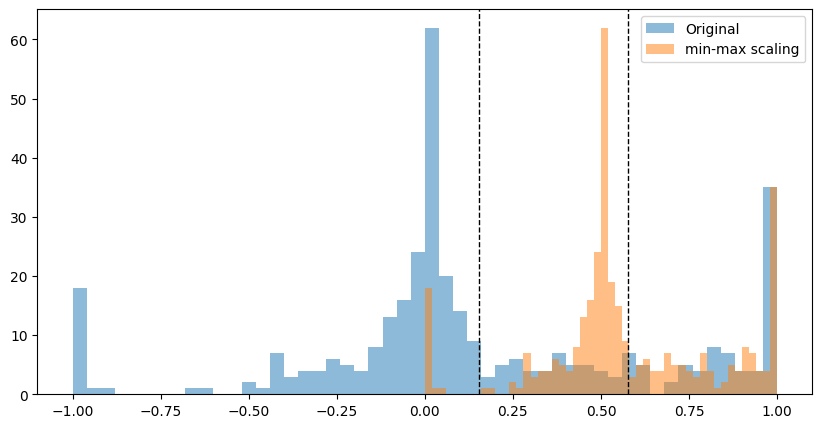

<Figure size 500x500 with 0 Axes>

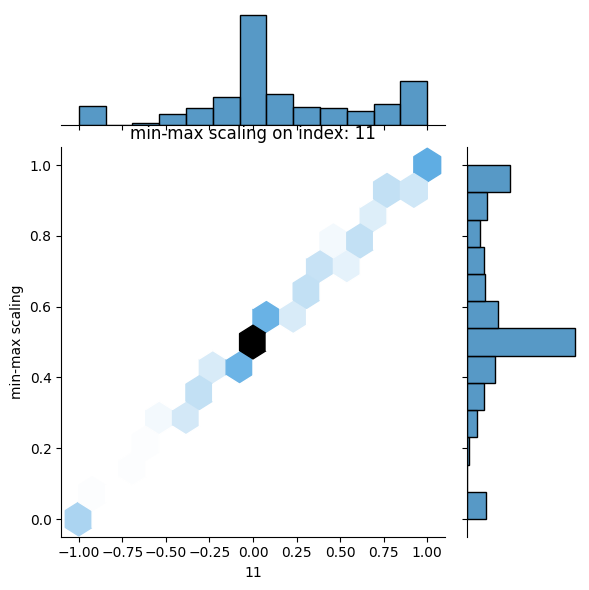

***** scaler name: robust scaling with index 11 *****


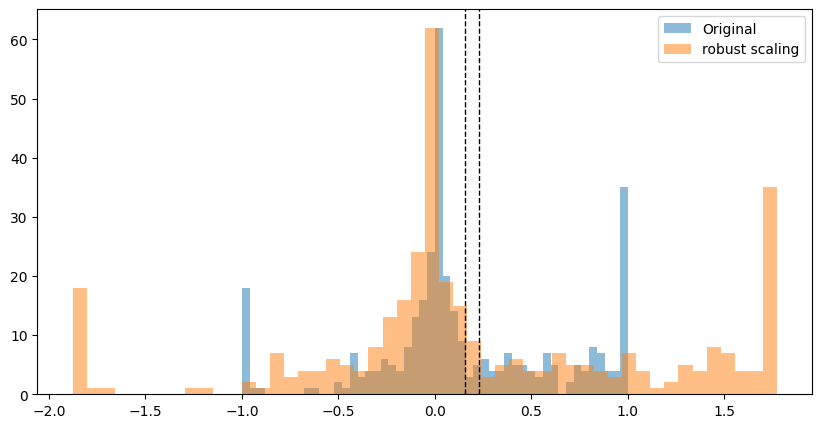

<Figure size 500x500 with 0 Axes>

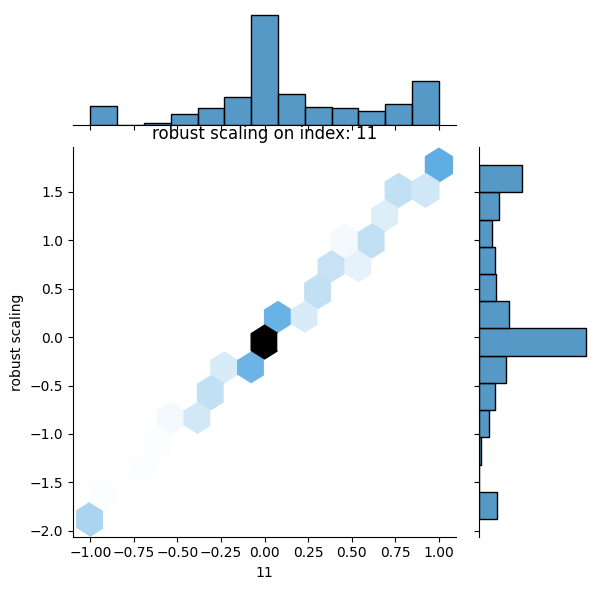

In [5]:
# Манипулирование данными
import pandas as pd # для манипулирования данными
import numpy as np

# Визуализация
import plotly.express as px # для визуализации данных
import matplotlib.pyplot as plt # для отображения рукописных цифр

# Sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn import *
from sklearn.datasets import * # для данных MNIST
from sklearn.manifold import TSNE # для снижения размерности с помощью t-SNE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

import seaborn as sns
from umap import *




def CreateDfx(dataset, index):
  dfX = pd.DataFrame(dataset)
  #print(dfX.head)
  dfX = pd.DataFrame(dfX[index])
  col = dfX[index].values.reshape(-1, 1)

  scalers = [
      #('Unscaled data', X),
      ('standard scaling', StandardScaler()),
      ('min-max scaling', MinMaxScaler()),
      ('max-abs scaling', MaxAbsScaler()),
      ('robust scaling', RobustScaler(quantile_range=(25, 75))),
      ('quantile transformation (uniform pdf)', QuantileTransformer(output_distribution='uniform')),
      ('quantile transformation (gaussian pdf)', QuantileTransformer(output_distribution='normal')),
      ('sample-wise L2 normalizing', Normalizer())
  ]

  for scaler in scalers:
      dfX[scaler[0]] = scaler[1].fit_transform(col)
      
  #print(dfX.head())

  return dfX


def plot_experiment(ScalerName, dfX, index):
  orig = dfX[index]
  orig_mean = orig.mean()
  bins = 50
  alpha=0.5
  normalized = dfX[ScalerName]
  plt.figure(figsize=(10,5))
  plt.hist(orig, bins, alpha=alpha, label='Original')
  plt.axvline(orig_mean, color='k', linestyle='dashed', linewidth=1)

  plt.hist(normalized, bins, alpha=alpha, label=ScalerName)
  plt.axvline(normalized.mean(), color='k', linestyle='dashed', linewidth=1)
  plt.legend(loc='upper right')

  plt.figure(figsize=(5,5))
  g = sns.jointplot(x=orig, y=ScalerName, data=dfX, kind='hex', ratio=3)
  #sns.violinplot(x='median_income', data=dfX, )
  #sns.violinplot(x='standard scaling', data=dfX)
  #plt.boxplot(dfX['median_income'])
  #plt.boxplot(dfX['standard scaling'])
  plt.title(f"{ScalerName} on index: {index}")
  plt.show()

def pltWithScaler(rawData, ScalerName, reducer):
    scaled_data = ScalerName().fit_transform(rawData)
    embedded = reducer.fit_transform(scaled_data)
    print(embedded.shape)
    plt.scatter(
        embedded[:, 0],
        embedded[:, 1]
        # c=[sns.color_palette()[x] for x in tps.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{reducer.__class__.__name__} projection with {ScalerName.__name__} of the Ionsphere dataset', fontsize=24)
    plt.show()

#reducerUMAP = UMAP(n_jobs=-1)

# pltWithScaler(data, preprocessing.StandardScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.MinMaxScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.RobustScaler, reducerUMAP)

if __name__ == "__main__":
    data = []
    with open("Data/ionosphere - ionosphere.csv", "r") as file:
        file.readline()
        data = np.loadtxt(file, delimiter=",")

    #print(data.shape)
    scalers = [
      #('Unscaled data', X),
      ('standard scaling', StandardScaler()),
      ('min-max scaling', MinMaxScaler()),
      #('max-abs scaling', MaxAbsScaler()),
      ('robust scaling', RobustScaler(quantile_range=(25, 75))),
      #('quantile transformation (uniform pdf)', QuantileTransformer(output_distribution='uniform')),
      #('quantile transformation (gaussian pdf)', QuantileTransformer(output_distribution='normal')),
      #('sample-wise L2 normalizing', Normalizer())
    ]
    scalersList = []

    for ScalerName in scalers:
      scalersList.append(ScalerName[0])
  
    for scalerName in scalersList:  
      for index in [11]:
        print(f"{'*' * 5} scaler name: {scalerName} with index {index} {'*' * 5}")
        plot_experiment(scalerName, CreateDfx(data, index), index)
    # reducerTSNE = TSNE(n_jobs=-1,
    #                    # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
    #                    )
    # reducerUMAP = UMAP(n_jobs=-1)
    # pltWithScaler(data, preprocessing.StandardScaler, reducerTSNE)
    # pltWithScaler(data, preprocessing.MinMaxScaler, reducerTSNE)
    # pltWithScaler(data, preprocessing.RobustScaler, reducerTSNE)

    # pltWithScaler(data, preprocessing.StandardScaler, reducerUMAP)
    # pltWithScaler(data, preprocessing.MinMaxScaler, reducerUMAP)
    # pltWithScaler(data, preprocessing.RobustScaler, reducerUMAP)



In [10]:
import numpy as np  # For linear algebra
import pandas as pd  # For data manipulation

import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For visualization
from sklearn.manifold import TSNE
from sklearn import preprocessing
# %matplotlib inline

from sklearn.svm import SVC  # For SVM

from IPython.display import Image  # For images

import warnings

from umap import UMAP

warnings.filterwarnings('ignore')

reducerTSNE = TSNE(n_jobs=-1,
                   # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
                   )
reducerUMAP = UMAP(n_jobs=-1)
df = pd.read_csv("Data/dataset.csv")

col_names = df.columns

print(col_names)

df.columns = df.columns.str.strip()

print(df.columns)

# check distribution of target_class column
print(df["Status"].value_counts())

# view the percentage distribution of target_class column

print(df['Status'].value_counts() / np.float(len(df)))

print(round(df.describe(), 2))

# DrawHistPlots(df)

X = df.drop(["Status"], axis=1)
y = df["Status"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# check the shape of X_train and X_test

print(X_train.shape, X_test.shape)
print("*" * 10, "X_train.shape, X_test.shape", "*" * 10)
print(X_train.head, X_test.head)

cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()



Index(['Exam 1 marks', 'Exam 2 marks', 'Status'], dtype='object')
Index(['Exam 1 marks', 'Exam 2 marks', 'Status'], dtype='object')
1    60
0    40
Name: Status, dtype: int64
1    0.6
0    0.4
Name: Status, dtype: float64
       Exam 1 marks  Exam 2 marks  Status
count        100.00        100.00  100.00
mean          65.64         66.22    0.60
std           19.46         18.58    0.49
min           30.06         30.60    0.00
25%           50.92         48.18    0.00
50%           67.03         67.68    1.00
75%           80.21         79.36    1.00
max           99.83         98.87    1.00
(80, 2) (20, 2)
********** X_train.shape, X_test.shape **********
<bound method NDFrame.head of     Exam 1 marks  Exam 2 marks
43     82.368754     40.618255
62     56.253817     39.261473
3      60.182599     86.308552
71     64.039320     78.031688
45     62.222676     52.060992
..           ...           ...
96     42.261701     87.103851
67     49.072563     51.883212
64     44.668262     66.4

,Exam 1 marks,Exam 2 marks
count,8.000000e+01,8.000000e+01
mean,-6.661338e-17,2.553513e-16
std,1.006309e+00,1.006309e+00
min,-1.819123e+00,-1.924090e+00
25%,-7.476022e-01,-1.032450e+00
50%,5.102202e-02,3.988464e-02
75%,7.983973e-01,9.908210e-01
max,1.654467e+00,1.691773e+00


Model accuracy score with default hyperparameters: 0.8000
Model accuracy score with rbf kernel and C=100.0 : 0.9000
Model accuracy score with rbf kernel and C=1000.0 : 0.9500
Model accuracy score with linear kernel and C=1.0 : 0.8500
Model accuracy score with linear kernel and C=100.0 : 0.8500
Model accuracy score with linear kernel and C=1000.0 : 0.8000
y_pred_train:  [0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 1 0]
Training-set accuracy score: 0.9125
Training set score: 0.9125
Test set score: 0.8500
Model accuracy score with polynomial kernel and C=1.0 : 0.8500
Model accuracy score with polynomial kernel and C=1.0 : 0.9000
Model accuracy score with sigmoid kernel and C=1.0 : 0.8500
Model accuracy score with sigmoid kernel and C=100.0 : 0.8500
Confusion matrix

 [[8 0]
 [3 9]]

True Positives(TP) =  8

True Negatives(TN) =  9

False Positives(FP) =  0

False Negatives(FN)

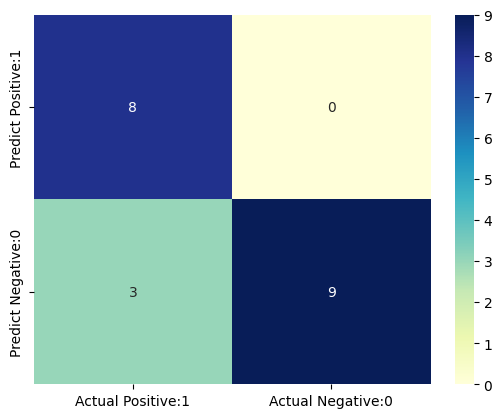

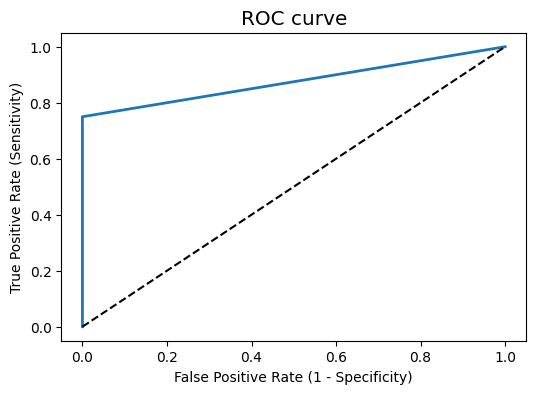

In [11]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
# Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.
# TODO Просомтреть различные виды ядер, разеными параметрами С и другими
svc = SVC()

# fit classifier to training set
svc.fit(X_train, y_train)

# make predictions on test set
y_pred = svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# instantiate classifier with rbf kernel and C=100
svc = SVC(C=100.0)

# fit classifier to training set
svc.fit(X_train, y_train)

# make predictions on test set
y_pred = svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# instantiate classifier with rbf kernel and C=1000
svc = SVC(C=1000.0)

# fit classifier to training set
svc.fit(X_train, y_train)

# make predictions on test set
y_pred = svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear', C=1.0)

# fit classifier to training set
linear_svc.fit(X_train, y_train)

# make predictions on test set
y_pred_test = linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

# instantiate classifier with linear kernel and C=100.0
linear_svc100 = SVC(kernel='linear', C=100.0)

# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred = linear_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# instantiate classifier with linear kernel and C=1000.0
linear_svc1000 = SVC(kernel='linear', C=1000.0)

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

# make predictions on test set
y_pred = linear_svc1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.

y_pred_train = linear_svc.predict(X_train)

print("y_pred_train: ", y_pred_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

# instantiate classifier with polynomial kernel and C=1.0
poly_svc = SVC(kernel='poly', C=1.0)

# fit classifier to training set
poly_svc.fit(X_train, y_train)

# make predictions on test set
y_pred = poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# instantiate classifier with polynomial kernel and C=100.0
poly_svc100 = SVC(kernel='poly', C=100.0)

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred = poly_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc = SVC(kernel='sigmoid', C=1.0)

# fit classifier to training set
sigmoid_svc.fit(X_train, y_train)

# make predictions on test set
y_pred = sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100 = SVC(kernel='sigmoid', C=100.0)

# fit classifier to training set
sigmoid_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred = sigmoid_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print("Classification metrices")

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

from math import sqrt

f1_score = sqrt(recall * precision)

print('F1 Score : {0:0.4f}'.format(recall))

# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()



# reducerUMAP = UMAP(n_jobs=-1)

# pltWithScaler(data, preprocessing.StandardScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.MinMaxScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.RobustScaler, reducerUMAP)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


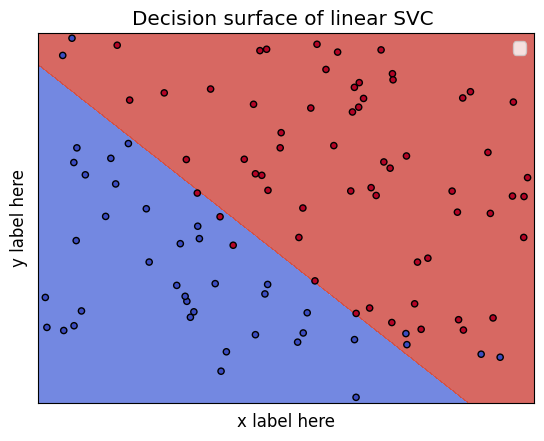

In [13]:
# X = X.iloc[:, 10:13]

def test(index):
  def make_meshgrid(x, y, h=.02):
      x_min, x_max = x.min() - 1, x.max() + 1
      y_min, y_max = y.min() - 1, y.max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      return xx, yy

  def plot_contours(ax, clf, xx, yy, **params):
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      out = ax.contourf(xx, yy, Z, **params)
      return out

  model = SVC(kernel='linear')
  clf = model.fit((X.to_numpy())[:, index:index+4], y.to_numpy())

  fig, ax = plt.subplots()
  # title for the plots
  title = ('Decision surface of linear SVC ')
  # Set-up grid for plotting.
  X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('y label here')
  ax.set_xlabel('x label here')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  ax.legend()
  plt.show()

for i in range(1):
  test(i)